In [1]:
from dreye.hardware import dummy_system
from dreye.hardware import dummy_spectrometer
from dreye.core.spectrum_utils import create_gaussian_spectrum
import numpy as np
import matplotlib.pyplot as plt
import warnings

ImportError: cannot import name 'UREG' from 'dreye.constants' (/Users/matthias.christenson/Documents/dreye/dreye/constants/__init__.py)

Text(0, 0.5, 'irradiance')

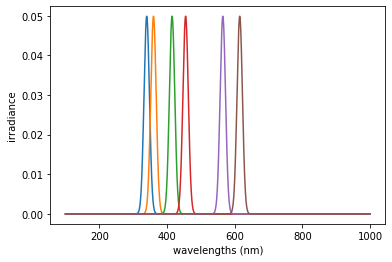

In [2]:
wls = np.arange(100, 1000, 0.1)
dummy_leds = create_gaussian_spectrum(
    wls, 
    [340, 360, 415, 455, 565, 615], 
    std=8, 
    units='spectralirradiance'
)
plt.plot(dummy_leds.domain, dummy_leds)
plt.xlabel('wavelengths (nm)')
plt.ylabel('irradiance')

In [3]:
leds = ['duv', 'uv', 'violet', 'rblue', 'lime', 'orange']
channels = ['Dev2/ao1', 'Dev3/ao1', 
            'Dev3/ao0', 'Dev1/ao1', 
            'Dev2/ao0', 'Dev1/ao0']
zeros = [4.4] * 5 + [0.]
maxs = [0.] * 5 + [5.]

In [4]:
outputs = []
for led, ch, z, m in zip(leds, channels, zeros, maxs):
    outputs.append(
        dummy_system.DummyOutput(
            ch, led, 
            zero_boundary=z, 
            max_boundary=m, 
            units='V'
        )
    )

In [5]:
system = dummy_system.DummySystem(outputs)

In [6]:
system

DummySystem contains:
DummyOutput(object=Dev2/ao1, name=duv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao1, name=uv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao0, name=violet, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao1, name=rblue, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev2/ao0, name=lime, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao0, name=orange, max=5.0 volt, zero=0.0 volt)

In [44]:
spec = dummy_spectrometer.Spectrometer(
    wls, 
    dummy_leds, 
    system,
    noise_scale=2, 
)

In [45]:
from dreye.hardware.measurement_runner import MeasurementRunner

In [46]:
runner = MeasurementRunner(
    system, 
    spec, 
    wls=None, # np.arange(200, 800, 1), 
    smoothing_window=1, 
    n_steps=10, 
    n_avg=1, 
    remove_zero=False, 
)

In [47]:
runner.run(verbose=2)


---------------------STARTING MEASUREMENTS-----------------------

-----------------------------------------------------------------
Starting measurement for duv.
sending 10 values
step 0: 4.4 volt == 0.0 photons/second
step 1: 3.9111111111111114 volt == 18240659.21401939 photons/second
step 2: 3.4222222222222225 volt == 36249819.40658154 photons/second
step 3: 2.9333333333333336 volt == 54052356.702296644 photons/second
step 4: 2.4444444444444446 volt == 71776956.78563641 photons/second
step 5: 1.9555555555555557 volt == 89334039.97940432 photons/second
step 6: 1.4666666666666668 volt == 107100655.8172891 photons/second
step 7: 0.9777777777777779 volt == 124821215.95797594 photons/second
step 8: 0.48888888888888893 volt == 142599930.53402936 photons/second
step 9: 0.0 volt == 159933167.48045442 photons/second
Finished measurement for "duv".
-----------------------------------------------------------------

Finished conversion of measurement for "duv".

-------------------------------

In [48]:
system.spms.units

<Unit('microE_Q')>

Text(0, 0.5, 'photon flux')

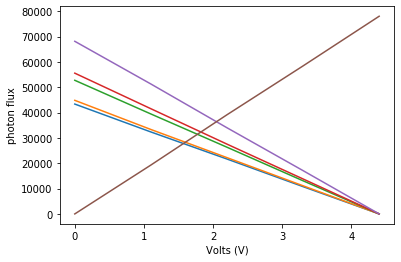

In [18]:
plt.plot(
    system.spms.domain, system.spms
)
plt.xlabel('Volts (V)')
plt.ylabel('photon flux')

In [54]:
system.spms.map(asarray([30000]*6))

array([[1.48284325, 1.70256737, 2.07797429, 2.24777266, 2.67474117,
        1.56477906]]) <Unit('volt')>

Text(0, 0.5, 'normalized flux intensity')

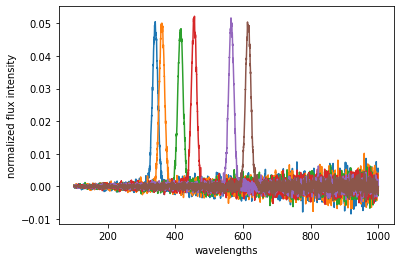

In [19]:
plt.plot(
    system.spms.normalized_spectrum.wavelengths, 
    system.spms.normalized_spectrum)
plt.xlabel('wavelengths')
plt.ylabel('normalized flux intensity')

In [27]:
runner.save('measurement_test.json')

In [51]:
from dreye.io import read_json

In [47]:
system_loaded = read_json('measurement_test.json')

In [48]:
print(system_loaded)

DummySystem contains:
DummyOutput(object=Dev2/ao1, name=duv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao1, name=uv, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev3/ao0, name=violet, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao1, name=rblue, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev2/ao0, name=lime, max=0.0 volt, zero=4.4 volt)
DummyOutput(object=Dev1/ao0, name=orange, max=5.0 volt, zero=0.0 volt)


Text(0, 0.5, 'photon flux')

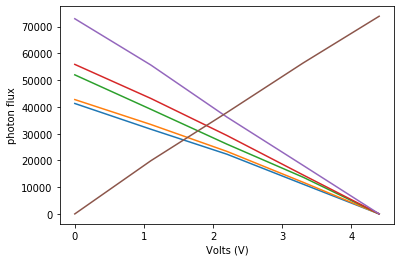

In [50]:
plt.plot(
    system_loaded.spms.domain, system_loaded.spms
)
plt.xlabel('Volts (V)')
plt.ylabel('photon flux')

Text(0, 0.5, 'normalized flux intensity')

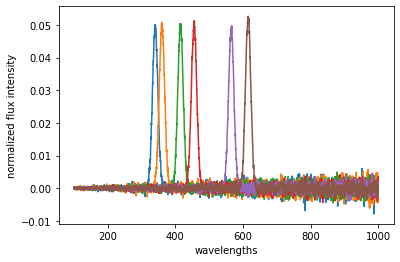

In [49]:
plt.plot(
    system_loaded.spms.normalized_spectrum.wavelengths, 
    system_loaded.spms.normalized_spectrum)
plt.xlabel('wavelengths')
plt.ylabel('normalized flux intensity')